# Extract Data Using SQL From Udacity Workspace

The data is available on udacity workspace. Only students from this course can directly download from it. Below codes were used to extract the data for this project. The extracted data are available on github.


```sql
-- download global data
SELECT * FROM global_data;

-- download Berlin data
SELECT *
FROM city_data
WHERE city = 'Berlin';

```

# Set up

In [0]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib

PROJECT_ROOT_DIR = '.'
CHAPTER_ID = 'WEATHER'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, CHAPTER_ID, 'IMAGES')
DATA_PATH = os.path.join(PROJECT_ROOT_DIR, CHAPTER_ID, 'DATASETS')
BERLIN_URL = 'https://raw.githubusercontent.com/AilingLiu/Data_Analyst_NanoDegree_Udacity/master/Project_Explore_Weather_Trends/data/berlin_temperature.csv'
GLOBAL_URL = 'https://raw.githubusercontent.com/AilingLiu/Data_Analyst_NanoDegree_Udacity/master/Project_Explore_Weather_Trends/data/global_temperature.csv'

if not os.path.isdir(IMAGES_PATH):
  os.makedirs(IMAGES_PATH)

if not os.path.isdir(DATA_PATH):
  os.makedirs(DATA_PATH)

#images
def save_fig(file_name, path=IMAGES_PATH, dpi=300, fmt='png'):
  file_path = os.path.join(path, file_name+'.'+fmt)
  plt.savefig(file_path, dpi=dpi, format=fmt)

#datasets
def fetch_data(file_name, data_link, path=DATA_PATH, fmt='csv'):
  file_path = os.path.join(path, file_name+'.'+fmt)
  urllib.request.urlretrieve(data_link,file_path)
  print('The data is downloaded in ', file_path)

def load_data(file_name, path = DATA_PATH, fmt='csv'):
  file_path=os.path.join(path, file_name+'.'+fmt)
  return pd.read_csv(file_path)


In [0]:
fetch_data('berlin_temp', BERLIN_URL)
fetch_data('global_temp', GLOBAL_URL)

The data is downloaded in  ./WEATHER/DATASETS/berlin_temp.csv
The data is downloaded in  ./WEATHER/DATASETS/global_temp.csv


In [0]:
berlin_temp = load_data('berlin_temp')
global_temp = load_data('global_temp')
berlin_temp.head()

,year,city,country,avg_temp
0,1743,Berlin,Germany,6.33
1,1744,Berlin,Germany,10.36
2,1745,Berlin,Germany,1.43
3,1746,Berlin,Germany,NaN
4,1747,Berlin,Germany,NaN


In [0]:
global_temp.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [0]:
inds = np.where(berlin_temp.year <1750)[0] #drop the years from berlin that were not available in global record
berlin_temp = berlin_temp.drop(index=inds, axis=0)

# Line chart

In [0]:
berlin_temp['roll_5y']=berlin_temp['avg_temp'].rolling(5, min_periods=1).mean()
berlin_temp['roll_10y']=berlin_temp['avg_temp'].rolling(10, min_periods=1).mean()
berlin_temp['roll_15y']=berlin_temp['avg_temp'].rolling(15, min_periods=1).mean()
berlin_temp['roll_20y']=berlin_temp['avg_temp'].rolling(20, min_periods=1).mean()
berlin_temp['roll_50y']=berlin_temp['avg_temp'].rolling(50, min_periods=1).mean()
berlin_temp['roll_100y']=berlin_temp['avg_temp'].rolling(100, min_periods=1).mean()

global_temp['roll_5y']=global_temp['avg_temp'].rolling(5, min_periods=1).mean()
global_temp['roll_10y']=global_temp['avg_temp'].rolling(10, min_periods=1).mean()
global_temp['roll_15y']=global_temp['avg_temp'].rolling(15, min_periods=1).mean()
global_temp['roll_20y']=global_temp['avg_temp'].rolling(20, min_periods=1).mean()
global_temp['roll_50y']=global_temp['avg_temp'].rolling(50, min_periods=1).mean()
global_temp['roll_100y']=global_temp['avg_temp'].rolling(100, min_periods=1).mean()


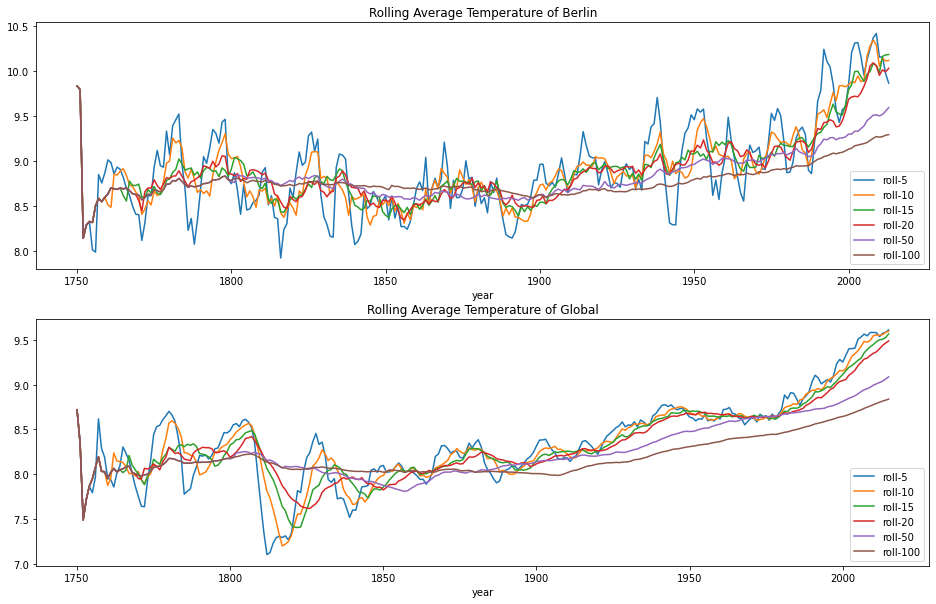

In [0]:
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

berlin_temp.plot(x='year', y='roll_5y', kind='line', ax=axes[0], label='roll-5')
berlin_temp.plot(x='year', y='roll_10y', kind='line', ax=axes[0], label='roll-10')
berlin_temp.plot(x='year', y='roll_15y', kind='line', ax=axes[0], label='roll-15')
berlin_temp.plot(x='year', y='roll_20y', kind='line', ax=axes[0], label='roll-20')
berlin_temp.plot(x='year', y='roll_50y', kind='line', ax=axes[0], label='roll-50')
berlin_temp.plot(x='year', y='roll_100y', kind='line', ax=axes[0], label='roll-100')
axes[0].set(title='Rolling Average Temperature of Berlin')
axes[0].legend(loc='lower right')

global_temp.plot(x='year', y='roll_5y', kind='line', ax=axes[1], label='roll-5')
global_temp.plot(x='year', y='roll_10y', kind='line', ax=axes[1], label='roll-10')
global_temp.plot(x='year', y='roll_15y', kind='line', ax=axes[1], label='roll-15')
global_temp.plot(x='year', y='roll_20y', kind='line', ax=axes[1], label='roll-20')
global_temp.plot(x='year', y='roll_50y', kind='line', ax=axes[1], label='roll-50')
global_temp.plot(x='year', y='roll_100y', kind='line', ax=axes[1], label='roll-100')
axes[1].set(title='Rolling Average Temperature of Global')
axes[1].legend(loc='lower right')
save_fig('Rolling_Summary_of_Berlin_and_Global')

In [0]:
global_temp.loc[[59, 69], ['year', 'roll_10y']]

,year,roll_10y
59,1809,8.297
69,1819,7.252


1. What's the trend among all the rolling scale, 5 rolling average, 10 rolling average, etc.?

In both plots, the larger scale of rolling window, the smoother the line becomes. The 5 year rolling average line in Berlin was much wavier compared to the global 5 year rolling average line.

2. How do the changes in your city’s temperatures over time compare to the changes in the global average?

Temperature of Berlin and Global were both increasing over the years. The slope of increase were much higher after 1950s.

3. What does the overall trend look like? Is the world getting hotter or cooler? 
Has the trend been consistent over the last few hundred years?

It became hotter over the years, but there was exception at around 1810s. In the world, the average temperature was 8.3 in 1800s, then it dropped to 7.3 in 1810s. During this time, Berlin maintained at 8 degree. 

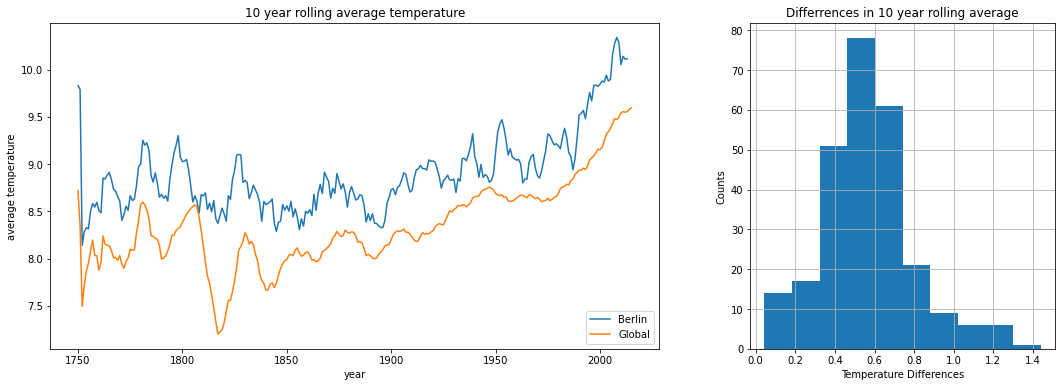

In [0]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'width_ratios': [2, 1]})

berlin_x = berlin_temp.year.values
global_x = global_temp.year.values

ax1.plot(berlin_x, berlin_temp['roll_10y'], label='Berlin')
ax1.plot(global_x, global_temp['roll_10y'], label='Global')
ax1.legend(loc='lower right')
ax1.set(title='10 year rolling average temperature', xlabel='year', ylabel='average temperature')

gl10y = global_temp[['year', 'roll_10y']]
bl10y = berlin_temp[['year', 'roll_10y']]
full10y = gl10y.merge(bl10y, on='year', how='outer', suffixes=('_global', '_berlin')).sort_values(by='year')
full10y['diff'] = full10y['roll_10y_berlin'] - full10y['roll_10y_global']
full10y['diff'].hist(ax=ax2)
ax2.set(title='Differrences in 10 year rolling average', xlabel='Temperature Differences', ylabel='Counts')
save_fig('10_year_rolling_average_temperature')

4. Is your city hotter or cooler on average compared to the global average? Has the difference been consistent over time?

The 10 year rolling average linechart shows Berlin is above global average in general. In general, Berlin is 0.5 degree more than the global temperature. The largest difference was at 1819, where the average rolling differences in the past decade was 1.28, being Berlin is 1.28 degree hotter than global.

In [0]:
full10y.reindex(full10y['diff'].abs().sort_values(ascending=False).index).head(10)

,year,roll_10y_global,roll_10y_berlin,diff
1,1751,8.350,9.790,1.440
69,1819,7.252,8.534,1.282
68,1818,7.223,8.457,1.234
74,1824,7.653,8.841,1.188
76,1826,7.910,9.095,1.185
67,1817,7.203,8.372,1.169
75,1825,7.768,8.935,1.167
70,1820,7.322,8.474,1.152
65,1815,7.482,8.614,1.132
0,1750,8.720,9.830,1.110
